# Preliminaries

In [7]:
%matplotlib inline

In [8]:
from __future__ import unicode_literals, division

import IPython
import warnings
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from pylab import *
from IPython.display import HTML
from IPython.display import display as prnt

# Notebook Options
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

# Matplotlib Styles
c = {'axes.labelsize': 17,
'axes.titlesize': 16,
'figure.figsize': [18, 8],
'grid.linewidth': 1.6,
'legend.fontsize': 17,
'lines.linewidth': 2,
'lines.markeredgewidth': 0.0,
'lines.markersize': 11,
'patch.linewidth': 0.5,
'xtick.labelsize': 16,
'xtick.major.pad': 20,
'xtick.major.width': 2,
'xtick.minor.width': 1,
'ytick.labelsize': 16.0,
'ytick.major.pad': 20,
'ytick.major.width': 2,
'ytick.minor.width': 1 }
wide_c = dict(c, **{'figure.figsize':[20,8]})

#### Utility Functions

In [9]:
def table(df,replace_match="",replace_str=""):
    return IPython.display.display(HTML(df.to_html().replace('<table border="1" class="dataframe">','<table class="table table-striped table-hover">').replace(replace_match,replace_str)))

In [10]:
df = pd.read_csv('dogs2.csv')

## Fix the data

In [11]:
df.head()

,Dog breed,Category,Popularity 2008,Popularity 2009,Popularity 2011,Popularity 2013,Popularity 2014,Intelligence,Intelligence category,Command Repetition,...,Lifetime Food Cost,Lifetime Other Cost,Other Cost per Week,Grooming Required,Suitability for Children,Size,Weight in kg,Weight in lbs,Shoulder Height in cm,Shoulder Height in inch
0,Affenpinscher,toy,131,133,139,143,138,37,Above average,15-25,...,3643,13686,1198,week,medium,small,NaN,NaN,26,10
1,Afghan Hound,hound,93,91,88,95,95,80,Lowest,80-100,...,8319,14285,1198,day,high,large,25,55,66,26
2,Airedale Terrier,terrier,58,59,55,56,56,29,Above average,15-25,...,NaN,13722,1198,NaN,NaN,medium,NaN,NaN,58,23
3,Akita,working,51,50,47,45,45,54,Average,25-40,...,7091,12176,1198,week,low,large,NaN,NaN,66,26
4,Alaskan Malamute,working,59,58,58,57,53,50,Average,25-40,...,7447,12787,1198,day,medium,large,36,80,61,24


In [12]:
# Features selected to be analyzed
feat = ['Popularity 2008', 'Popularity 2009', 'Popularity 2011','Popularity 2013', 'Popularity 2014','Dog breed', 'Category', 'Life Expectancy', 'Intelligence', 'No. of Ailments', 'Total Cost', 'Size']

In [13]:
df2 = df[feat]

In [14]:
# Categorize Intelligence level of dogs by command repetition count 
def cr(x):
    if x == '<5' or x == '5-15':
        return 4
    elif x == '15-25':
        return 3
    elif x == '25-40':
        return 2
    elif x == '40-80' or x == '80-100':
        return 1
    else:
        return 0

df2['Intelligence category'] = df['Command Repetition'].apply(cr)

In [15]:
# Categorize popularity of dogs into 4 groups
def pop(x):
    if x < 44:
        return 4
    elif x < 87:
        return 3
    elif x < 130:
        return 2
    elif x < 173:
        return 1
    else:
        return 0

df2['Popularity 2008'] = df['Popularity 2008'].apply(pop)
df2['Popularity 2009'] = df['Popularity 2009'].apply(pop)
df2['Popularity 2011'] = df['Popularity 2011'].apply(pop)
df2['Popularity 2013'] = df['Popularity 2013'].apply(pop)
df2['Popularity 2014'] = df['Popularity 2014'].apply(pop)

In [16]:
df2['Popularity Sum'] = df['Popularity 2008'] + df['Popularity 2009'] + df['Popularity 2011'] + df['Popularity 2013'] + df['Popularity 2014']

In [17]:
df2.head()

,Popularity 2008,Popularity 2009,Popularity 2011,Popularity 2013,Popularity 2014,Dog breed,Category,Life Expectancy,Intelligence,No. of Ailments,Total Cost,Size,Intelligence category,Popularity Sum
0,1,1,1,1,1,Affenpinscher,toy,11.42,37,0,18040,small,3,684
1,2,2,2,2,2,Afghan Hound,hound,11.92,80,0,23694,large,1,462
2,3,3,3,3,3,Airedale Terrier,terrier,11.45,29,1,NaN,medium,3,284
3,3,3,3,3,3,Akita,working,10.16,54,1,20668,large,2,238
4,3,3,3,3,3,Alaskan Malamute,working,10.67,50,2,21643,large,2,285


# EDA

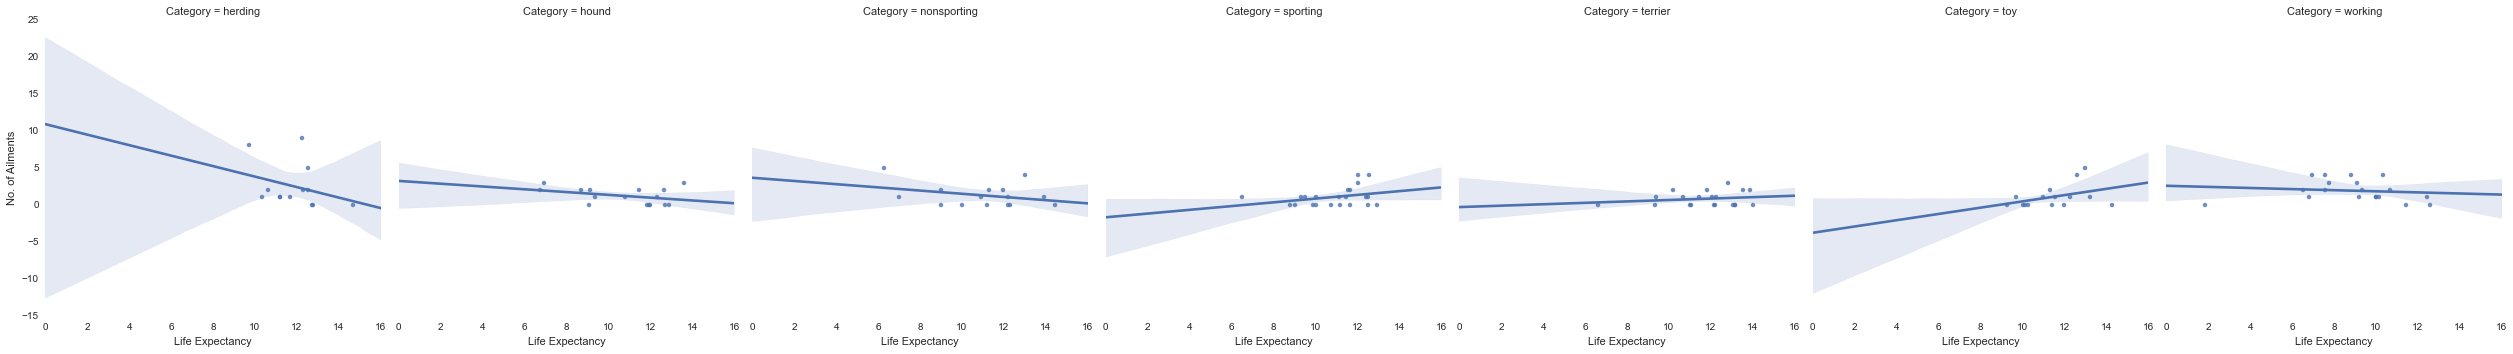

In [18]:
sns.lmplot("Life Expectancy", "No. of Ailments", df2, col="Category")

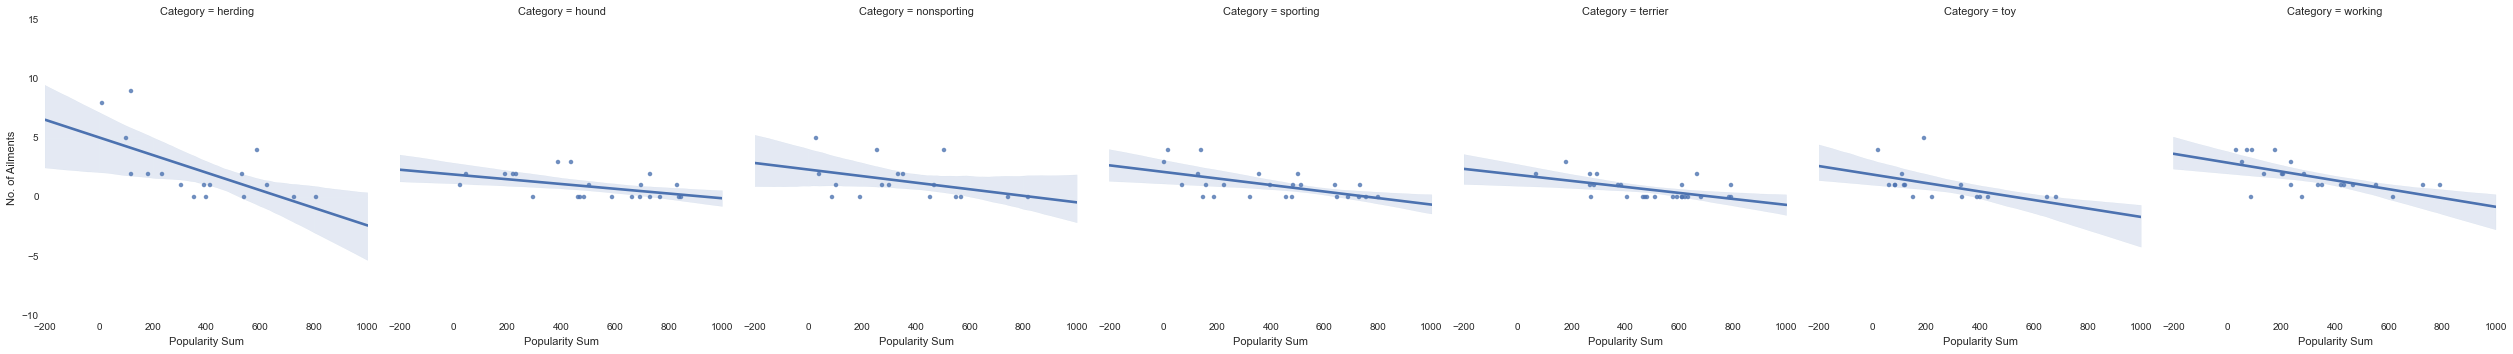

In [19]:
sns.lmplot("Popularity Sum", "No. of Ailments", df2, col = "Category", dropna=True)

In [26]:
df.columns

Index([u'Dog breed', u'Category', u'Popularity 2008', u'Popularity 2009',
       u'Popularity 2011', u'Popularity 2013', u'Popularity 2014',
       u'Intelligence', u'Intelligence category', u'Command Repetition',
       u'First Command Response Rate', u'Life Expectancy', u'Ailments Summary',
       u'No. of Ailments', u'Ailments Detail', u'Cutenss', u'Total Cost',
       u'Average Purchae Price', u'Price Bracket', u'Food Cost per Week',
       u'Lifetime Food Cost', u'Lifetime Other Cost', u'Other Cost per Week',
       u'Grooming Required', u'Suitability for Children', u'Size',
       u'Weight in kg', u'Weight in lbs', u'Shoulder Height in cm',
       u'Shoulder Height in inch'],
      dtype='object')

In [30]:
df = df.set_index('Dog breed')

KeyError: u'Dog breed'

In [31]:
df.ix[:,1:7]

,Popularity 2008,Popularity 2009,Popularity 2011,Popularity 2013,Popularity 2014,Intelligence
Dog breed,,,,,,
Affenpinscher,131,133,139,143,138,37
Afghan Hound,93,91,88,95,95,80
Airedale Terrier,58,59,55,56,56,29
Akita,51,50,47,45,45,54
Alaskan Malamute,59,58,58,57,53,50
American English Coonhound,NaN,NaN,33,146,150,NaN
American Eskimo Dog,108,118,116,110,114,NaN
American Foxhound,157,162,173,176,174,46
American Staffordshire Terrier,71,70,72,76,82,34
